# Simple Position

In [1]:
%matplotlib notebook
from notebook_quick_setup import *

Beginning notebook setup...
	Added /home/jhewers/Documents/projects/jdrones/src to path
	Imported gymnasium version 0.27.1


pybullet build time: Feb  2 2023 13:13:41
/home/jhewers/.local/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


	Imported jdrones version unknown
	Imported scipy==1.7.3, numpy==1.23.5, pandas==1.3.5
	Imported functools, collections and itertools
	Imported tqdm (standard and trange)
	Imported seaborn==0.11.2, matplotlib==3.5.1
End of notebook setup


In [2]:
dt = 1/240

In [3]:
initial_state = State()
initial_state.pos = (0,0,1)

In [4]:
def run_sim(env, wps):
    observations = collections.deque()
    obs, info = env.reset(seed=1337)

    for setpoint in tqdm(wps):
        obs, reward, term, trunc, info = env.step(setpoint)
    
        observations.append(np.copy(obs))

        if trunc:
            print(f"{trunc=} {term=} {info=}")
            break
    
    return observations

In [5]:
def plot_states(states):
    df = States(np.concatenate(states)).to_df(tag='Observations',dt=dt)
    fig, ax = plt.subplots(2,2,figsize=(10,8))
    ax = ax.flatten()

    sns.lineplot(data=df.query("variable in ('x','y','z')"), x='t',y='value',hue='variable', style='tag',ax=ax[0])
    ax[0].legend()

    sns.lineplot(data=df.query("variable in ('phi','theta','psi')"), x='t',y='value',hue='variable', style='tag',ax=ax[1])
    ax[1].legend()

    sns.lineplot(data=df.query("variable in ('vx','vy','vz')"), x='t',y='value',hue='variable', style='tag',ax=ax[2])
    ax[2].legend()

    sns.lineplot(data=df.query("variable in ('P0','P1','P2','P3')"), x='t',y='value',hue='variable', style='tag',ax=ax[3])
    ax[3].legend()

    fig.tight_layout()
    
    plt.show()

In [6]:
wps = [(10,0,10),(10,10,10),(0,0,10), (5,5,1)]

## Straight Line Trajectory

In [7]:
first_order_env = gymnasium.make("FirstOrderPolyPositionDroneEnv-v0", dt=dt, initial_state=initial_state)

/home/jhewers/.local/lib/python3.10/site-packages/gymnasium/spaces/box.py:129: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [8]:
first_order_obs = run_sim(first_order_env, wps)

  0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


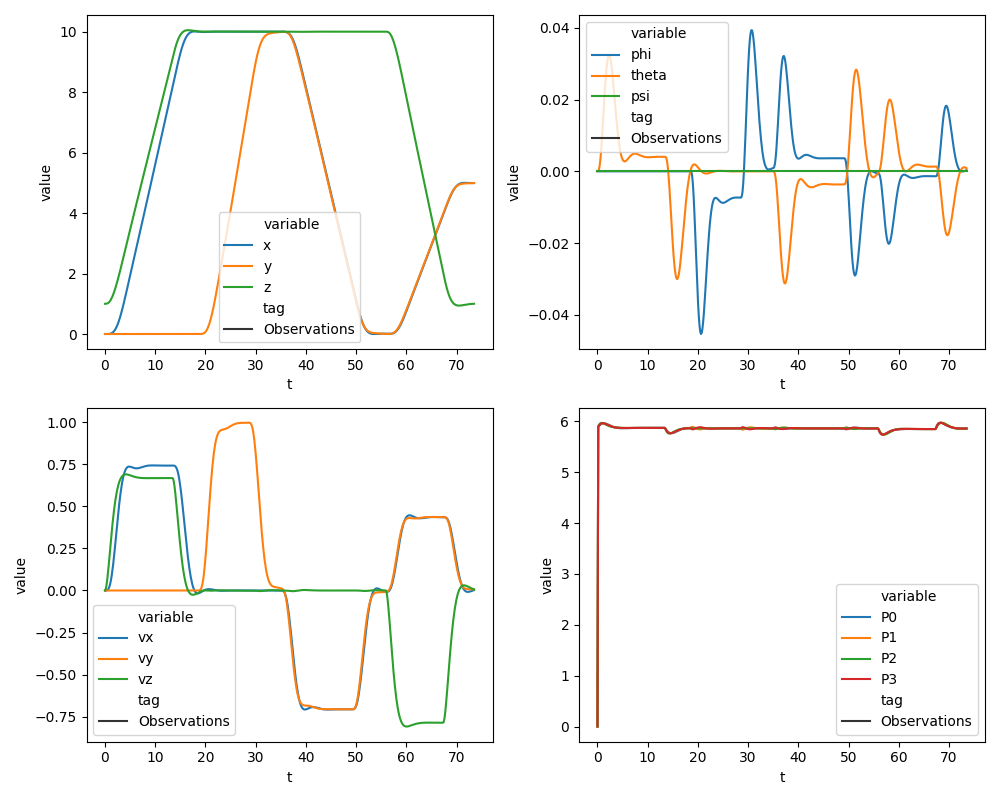

In [9]:
plot_states(first_order_obs)

## Polynomial Trajectory

In [10]:
fifth_order_env = gymnasium.make("FifthOrderPolyPositionDroneEnv-v0", dt=dt, initial_state=initial_state)

/home/jhewers/.local/lib/python3.10/site-packages/gymnasium/spaces/box.py:129: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [11]:
fifth_order_obs = run_sim(fifth_order_env, wps)

  0%|          | 0/4 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


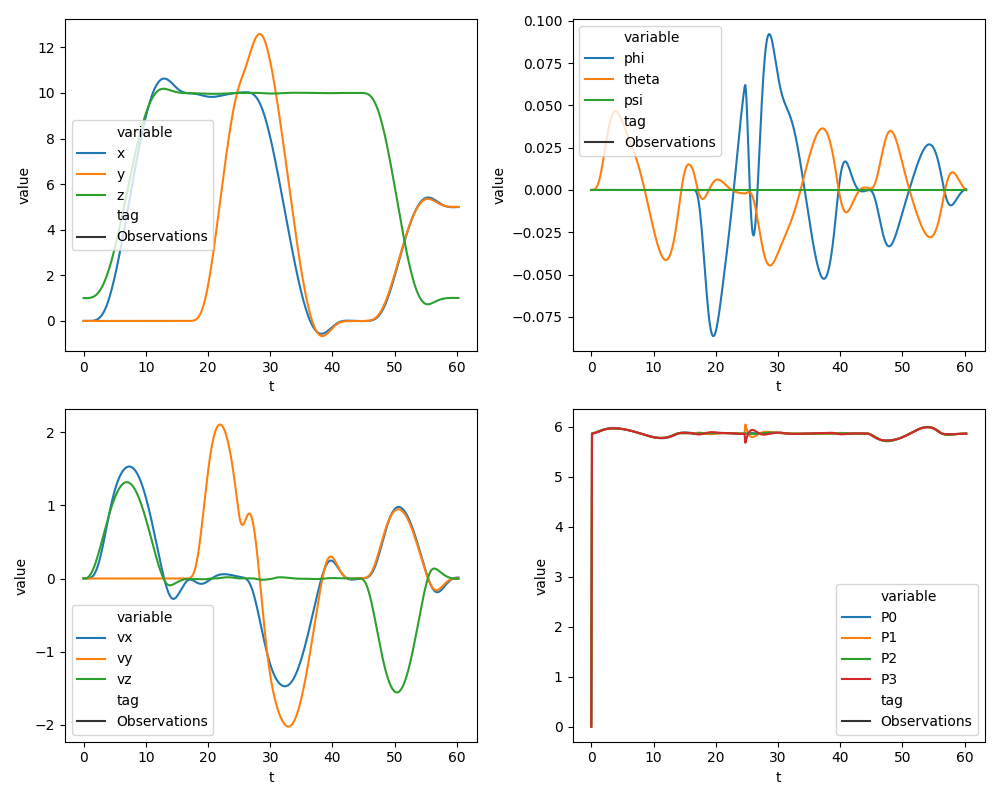

In [12]:
plot_states(fifth_order_obs)

## Plot XYZ Trajectories

<IPython.core.display.Javascript object>


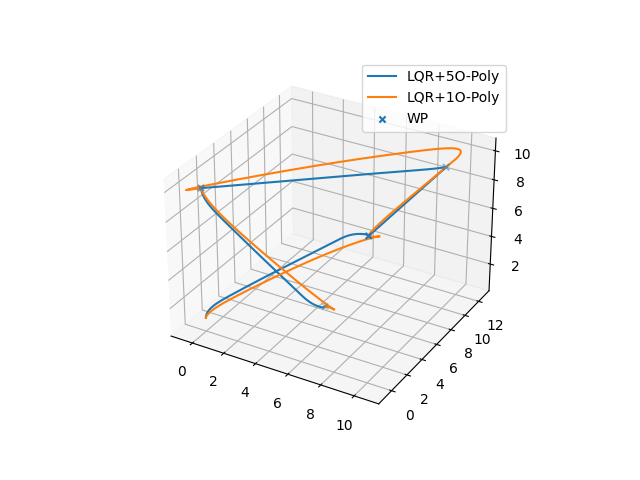

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

first_order_df = States(np.concatenate(first_order_obs)).to_df(tag='LQR+5O-Poly', dt=dt).sort_values("t")
x, y, z = (
    first_order_df[first_order_df.variable == "x"],
    first_order_df[first_order_df.variable == "y"],
    first_order_df[first_order_df.variable == "z"],
)
ax.plot(x.value, y.value, z.value, label="LQR+5O-Poly")

fifth_order_df = States(np.concatenate(fifth_order_obs)).to_df(tag='LQR+1O-Poly', dt=dt).sort_values("t")
x, y, z = (
    fifth_order_df[fifth_order_df.variable == "x"],
    fifth_order_df[fifth_order_df.variable == "y"],
    fifth_order_df[fifth_order_df.variable == "z"],
)
ax.plot(x.value, y.value, z.value, label="LQR+1O-Poly")

wps = np.array(wps)
ax.scatter(wps.T[0], wps.T[1], wps.T[2],marker='x', label="WP")

ax.legend()

plt.show()